<center>
    <h1> INF477 - Redes Neuronales Artificiales  </h1>
    <h2> Tarea #1: Perceptrones Multicapa o Redes FF </h2> 
</center>

Tarea realizada por:
* Alvaro Salinas - `alvaro.salinase@gmail.com` - **rol:** 201073001-8
* Martín Villanueva - `martin.villanueva@alumnos.usm.cl` - **rol:** 201104012-0

_DI UTFSM. Septiembre 2016._

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn.preprocessing import StandardScaler

# keras functionalities
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using Theano backend.


## Table de Contenidos
* [El XOR](#xor)
    * [Parte a)](#a)
    * [Parte b)](#b)
    * [Parte c)](#c)
* [Predicción del precio de una casa](#pred)
* [Reconocimiento de imágenes en CIFAR10](#rec)


<div id='xor' />
## 1.-  El XOR

<div id='a' />
### Parte a)

In [2]:
# for reproducibility of experiments
np.random.seed(2)

def xor_generator(m):
    """
    m: number of points to generate
    """
    # generate m random points on [-1,1]x[-1,1]
    X = 2.*np.random.random(m)-1.
    Y = 2.*np.random.random(m)-1. 
    
    # arrangement to cluster the points
    x_mask = X>0.
    y_mask = Y>0.
    X[x_mask] *= 0.8; X[x_mask] += 0.1
    X[~x_mask] *= 0.8; X[~x_mask] -= 0.1
    Y[y_mask] *= 0.8; Y[y_mask] += 0.1
    Y[~y_mask] *= 0.8; Y[~y_mask] -= 0.1    
    XY = np.vstack([X,Y]).T
    
    # generating the labels
    y = np.zeros(m, dtype=np.int)
    mask = np.multiply.reduce(XY, axis=1) > 0.
    y[mask] = 1
    return (XY, y)

def xor_plot(X,y):
    X0 = X[y==0]
    X1 = X[y==1]
    plt.figure(figsize=(7,7))
    plt.scatter(X0[:,0], X0[:,1], c='b')
    plt.scatter(X1[:,0], X1[:,1], c='r')
    plt.plot((-1.1,1.1),(0,0),'k--')
    plt.plot((0,0),(-1.1,1.1),'k--')
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    plt.show()

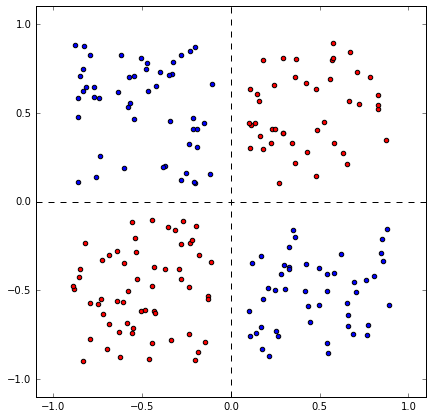

In [3]:
X,y = xor_generator(200)
xor_plot(X,y)

<div id='b' />
### Parte b)

In [4]:
model0 = Sequential()
model0.add(Dense(output_dim=1, input_dim=2, activation='sigmoid', init='normal'))
#model0.add(Dense(output_dim=1, activation='softmax'))
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [5]:
model0.fit(X, y, nb_epoch=200, verbose=0)

In [6]:
scores = model0.evaluate(X,y)
print("\n{0}: {1}%".format(model0.metrics_names[1], scores[1]*100))

 32/200 [===>..........................] - ETA: 0s
acc: 46.5%


<div id='c' />
### Parte c)

In [7]:
model1 = Sequential()
#model1.add(Dense(output_dim=10, input_dim=2, activation='relu', init='normal'))
model1.add(Dense(output_dim=10, input_dim=2, activation='tanh', init='normal'))
model1.add(Dense(output_dim=1, init='normal', activation='sigmoid'))
#model0.add(Dense(output_dim=1, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model1.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [260]:
model1.fit(X, y, nb_epoch=1000, verbose=0)

In [261]:
scores = model1.evaluate(X,y)
print("\n{0}: {1}%".format(model1.metrics_names[1], scores[1]*100))

 32/200 [===>..........................] - ETA: 0s
acc: 100.0%


<div id='pred' />
## 2.-  Predicción del precio de una casa

### Parte (a)

```python
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
```

In [2]:
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',', header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)

### Parte (b)

In [3]:
# mostrando algunas características del dataset contenido en el frame
print('Numero de ejemplos: {0}'.format(df.shape[0]))
print('Numero de características: {0}'.format(df.shape[1]))

Numero de ejemplos: 506
Numero de características: 14


In [289]:
df.info

<bound method DataFrame.info of          CRIM  ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0     0.00632  18   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12    0.09378  12  

In [290]:
df.describe

<bound method DataFrame.describe of          CRIM  ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0     0.00632  18   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12    0.09378  

### Parte (c)

In [4]:
df_test.describe

<bound method DataFrame.describe of          CRIM  ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
329   0.06724   0   3.24     0  0.460  6.333   17.2  5.2146    4  430   
371   9.23230   0  18.10     0  0.631  6.216  100.0  1.1691   24  666   
219   0.11425   0  13.89     1  0.550  6.373   92.4  3.3633    5  276   
403  24.80170   0  18.10     0  0.693  5.349   96.0  1.7028   24  666   
78    0.05646   0  12.83     0  0.437  6.232   53.7  5.0141    5  398   
15    0.62739   0   8.14     0  0.538  5.834   56.5  4.4986    4  307   
487   4.83567   0  18.10     0  0.583  5.905   53.2  3.1523   24  666   
340   0.06151   0   5.19     0  0.515  5.968   58.5  4.8122    5  224   
310   2.63548   0   9.90     0  0.544  4.973   37.8  2.5194    4  304   
102   0.22876   0   8.56     0  0.520  6.405   85.4  2.7147    5  384   
418  73.53410   0  18.10     0  0.679  5.957  100.0  1.8026   24  666   
411  14.05070   0  18.10     0  0.597  6.657  100.0  1.5275   24  666   
446   6.28807  

In [4]:
scaler = StandardScaler().fit(df_train)
df_train_scaled = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)
y_train_scaled = df_train_scaled.pop('MEDV')
X_train_scaled = df_train_scaled

In [5]:
# the same but for testing set
df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
y_test_scaled = df_test_scaled.pop('MEDV')
X_test_scaled = df_test_scaled

### Parte (d)

In [16]:
model = Sequential()
model.add(Dense(output_dim=200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error')

In [17]:
hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 7742457550023291371247370240.0000 - val_loss: 170214847316994206852776653225984.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [======

### Parte (e)

### Parte (f)

### Parte (g)

### Parte (h)

### Parte (i)

### Parte (j)

<div id='rec' />
## 3.-  Reconocimiento de imágenes en CIFAR10